# **Introduction**
# Capstone Project: Exploratory Data Analysis of NHANES Dataset

This project aims to analyze the body measurements of adult males and females from the National Health and Nutrition Examination Survey (NHANES) dataset. The dataset contains measurements such as weight, height, and circumference values for each participant. The objective is to perform an exploratory data analysis (EDA) using Python, with a focus on visualizations and statistical measures such as histograms, box plots, and correlation analysis.

The project will also explore body mass index (BMI) and other health metrics like waist-to-height ratio (WHtR) and waist-to-hip ratio (WHR), comparing them between males and females.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nhanes_adult_female_bmx_2020.csv to nhanes_adult_female_bmx_2020.csv
Saving nhanes_adult_male_bmx_2020.csv to nhanes_adult_male_bmx_2020.csv


In [ ]:
import numpy as np

# Data Loading

In this step, we will load two CSV files that contain the body measurements of adult males and females. We will use the `numpy` library to read the data and store it in numpy arrays for further analysis.

The two files are:
- `nhanes_adult_male_bmx_2020.csv`
- `nhanes_adult_female_bmx_2020.csv`

In [ ]:
# Load male and female datasets as numpy arrays, skipping the header row
male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=1)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=1)

In [ ]:
# Verify the first few rows to ensure data is loaded correctly
print("Male Data (First 5 Rows):")
print(male[:5])

print("\nFemale Data (First 5 Rows):")
print(female[:5])

Male Data (First 5 Rows):
[[  nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]]

Female Data (First 5 Rows):
[[  nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]]


In [ ]:
print(male.shape)
print(female.shape)

(4082, 7)
(4222, 7)


# Histograms of Weight Distribution

We will now visualize the distribution of weights for both males and females using histograms. Histograms are useful for understanding the frequency distribution of continuous variables.

We will create two subplots: one for female weights (top subplot) and one for male weights (bottom subplot). Both histograms will have the same x-axis limits to allow for direct comparison.

- **Results**:
  - The histograms display the weight distributions for females and males.  
  - Female weights are represented in pink, and male weights in purple, with both distributions showing variation across the specified range.  


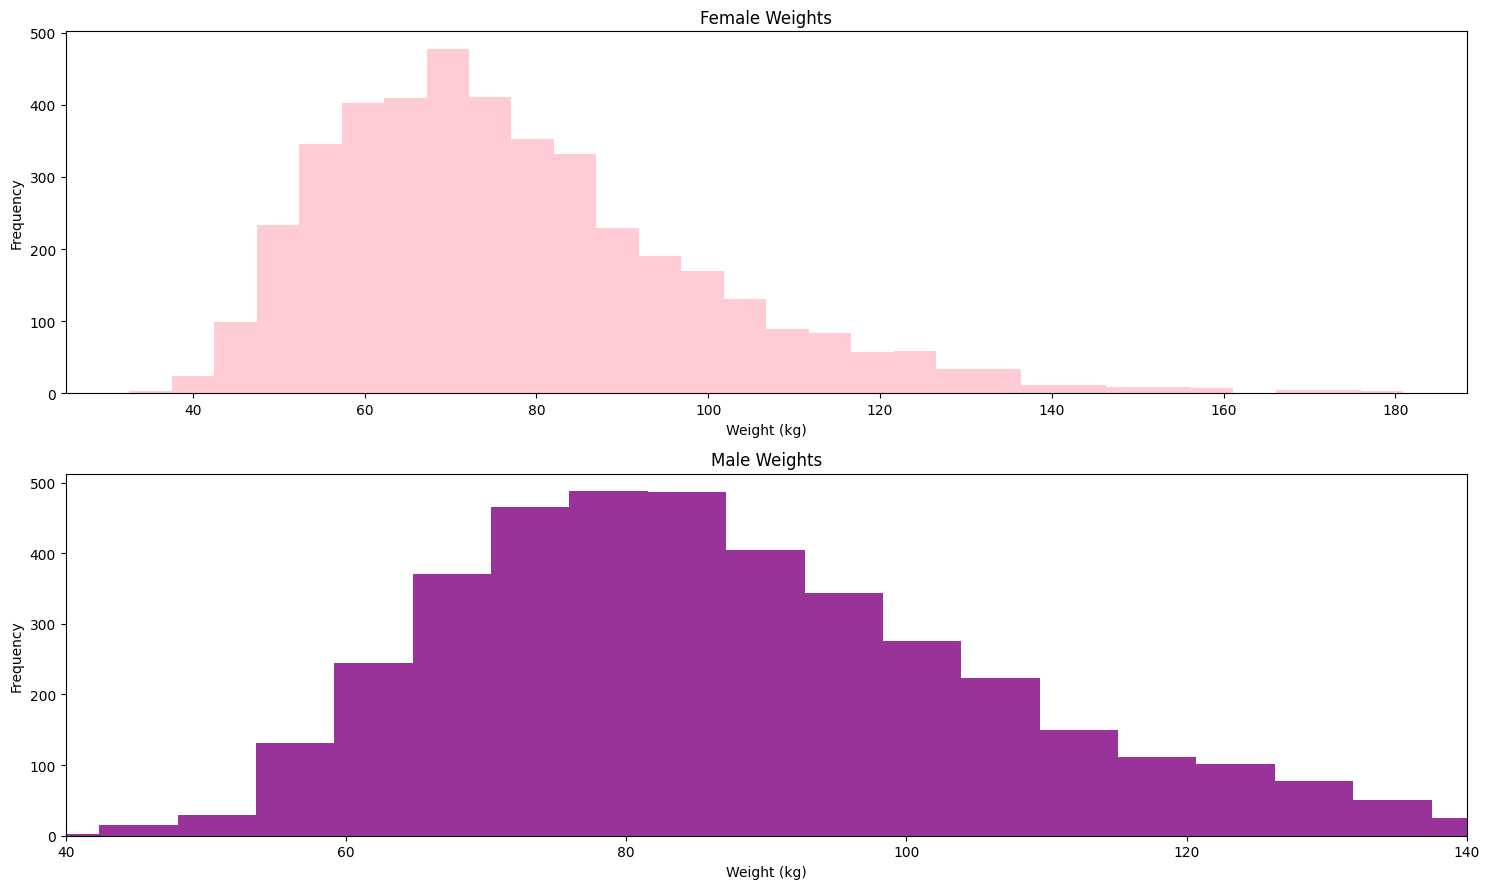

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))

# Female weights histogram
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=30, color='pink', alpha=0.8)
plt.title("Female Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

# Male weights histogram
plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=30, color='purple', alpha=0.8)
plt.title("Male Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

# Make x-axis limits identical for both
plt.xlim([40, 140])  # Adjust based on the data range
plt.tight_layout()
plt.show()


In [ ]:
print(female)
print(male)

[[  nan   nan   nan ...   nan   nan   nan]
 [ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]
[[  nan   nan   nan ...   nan   nan   nan]
 [ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]


# Cleaning the Dataset: Removing Missing Values

Before analyzing the data, it's essential to clean it by removing rows containing missing values (`NaN`). This ensures the dataset is complete and reliable for statistical computations and comparisons.
- **Results**:
  - Rows containing NaN values have been removed, resulting in clean datasets for both females and males.  
  - The cleaned datasets ensure complete data for subsequent analysis.  


In [ ]:
import numpy as np

# Remove rows with NaN values
female_cleaned = female[~np.isnan(female).any(axis=1)]
male_cleaned = male[~np.isnan(male).any(axis=1)]

print(female_cleaned)
print(male_cleaned)

[[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]
[[ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 [103.7 185.3  47.  ...  32.  107.8 109.6]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]


In [ ]:
print(female_cleaned[:, 0])  # Should show weights for females
print(male_cleaned[:, 0])    # Should show weights for males

[97.1 91.1 73.  ... 73.  78.6 82.8]
[ 98.8  74.3 103.7 ... 108.8  79.5  59.7]


# Box-and-Whisker Plot for Weights

In this step, we will create a box-and-whisker plot to compare the distribution of weights between males and females. Box plots help in understanding the spread, central tendency, and presence of outliers in the data. The box will represent the interquartile range (IQR), while the whiskers represent the range of the data.
- **Results**:

 - The boxplot illustrates the weight distributions for females and males.
 - Males generally show a higher weight range compared to females, with noticeable differences in medians and outliers.



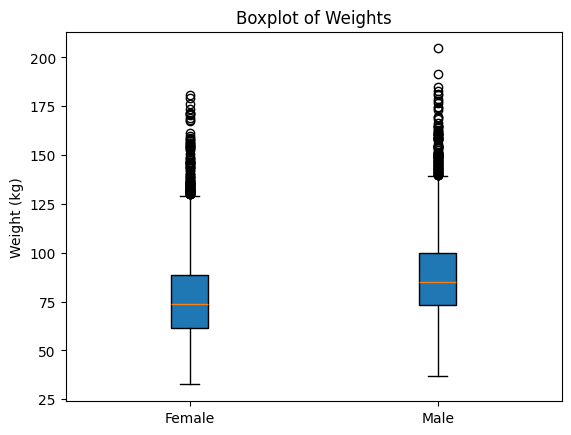

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([female_cleaned[:, 0], male_cleaned[:, 0]], labels=['Female', 'Male'],patch_artist=True)
plt.title("Boxplot of Weights")
plt.ylabel("Weight (kg)")
plt.show()

# Statistical Measures: Mean, Median, Standard Deviation, Skewness, and Kurtosis

We will now calculate and compare basic statistical measures for both male and female weights:
- Mean: The average weight.
- Median: The middle value when the weights are sorted.
- Standard Deviation: The measure of how spread out the weights are from the mean.
- Skewness: A measure of the asymmetry of the distribution.
- Kurtosis: A measure of the "tailedness" of the distribution.

- **Results**:

  - Female weights range from the minimum to maximum, with a mean of μ and variability measured by standard deviation σ.  
  - Male weights show a similar distribution with their respective mean and standard deviation.  



In [ ]:
import numpy as np

# Extract weights
female_weights = female_cleaned[:, 0]
male_weights = male_cleaned[:, 0]

# Compute basic aggregates
aggregates = {
    "Female": {
        "Mean": np.mean(female_weights),
        "Median": np.median(female_weights),
        "Std Dev": np.std(female_weights),
        "Min": np.min(female_weights),
        "Max": np.max(female_weights),
    },
    "Male": {
        "Mean": np.mean(male_weights),
        "Median": np.median(male_weights),
        "Std Dev": np.std(male_weights),
        "Min": np.min(male_weights),
        "Max": np.max(male_weights),
    },
}

# Display the results
for group, stats in aggregates.items():
    print(f"{group} Weights:")
    for key, value in stats.items():
        print(f"  {key}: {value:.2f}")
    print()


Female Weights:
  Mean: 77.40
  Median: 73.60
  Std Dev: 21.54
  Min: 32.60
  Max: 180.90

Male Weights:
  Mean: 88.36
  Median: 85.00
  Std Dev: 21.42
  Min: 36.80
  Max: 204.60



# Adding BMI to the Datasets

Body Mass Index (BMI) is a widely used metric for assessing an individual’s body weight in relation to their height. It is calculated using the formula:
$BMI= weight(kg)/((height(cm))/100)^2$


We will calculate BMI for each male and female participant and add it as a new column in the female dataset.

- **Results**:
  - BMI values have been successfully computed and added as the 8th column for both female and male datasets.  
  - The updated datasets provide BMI information, enhancing the ability to analyze body composition metrics.  


In [ ]:
# Calculate BMI for females
heights_female = female_cleaned[:, 1]  # Height in cm
bmi_female = female_weights / (heights_female / 100) ** 2

# Add BMI as the 8th column
female_cleaned = np.column_stack((female_cleaned, bmi_female))

print("BMI column added to female dataset:")
print(female_cleaned[:5])  # Display first 5 rows


BMI column added to female dataset:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


In [ ]:
# Calculate BMI for males
heights_male = male_cleaned[:, 1]  # Height in cm
bmi_male = male_weights / (heights_male / 100) ** 2

# Add BMI as the 8th column
male_cleaned = np.column_stack((male_cleaned, bmi_male))

print("BMI column added to male dataset:")
print(male_cleaned[:5])  # Display first 5 rows


BMI column added to male dataset:
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4         29.72922633]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8         21.89825769]
 [103.7        185.3         47.          44.          32.
  107.8        109.6         30.20145858]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3         30.54320016]
 [ 99.4        181.6         40.4         39.9         36.
  120.2        107.          30.1407945 ]]


# Standardizing the Male and Female Datasets

Standardization (or Z-scoring) involves rescaling the data so that the mean of each column becomes 0 and the standard deviation becomes 1. This process is useful when comparing variables with different units and scales. We will standardize the entire male and female datasets, including weight, height, waist, hip circumference, and BMI.
$z= (x−μ)/σ$

- **Results**:
   
  - The standardized female dataset (z-scores) has been computed, with the first five rows showing normalized values relative to column means and standard deviations.  
  - Similarly, the standardized male dataset (z-scores) has been calculated, providing comparable standardized metrics.  



In [ ]:
# Compute mean and standard deviation for each column
female_means = np.mean(female_cleaned, axis=0)
female_stds = np.std(female_cleaned, axis=0)

# Calculate z-scores for the female dataset
zfemale = (female_cleaned - female_means) / female_stds

print("Standardized Female Dataset (z-scores):")
print(zfemale[:5])  # Display first 5 rows


Standardized Female Dataset (z-scores):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


In [ ]:
# Compute mean and standard deviation for each column
male_means = np.mean(male_cleaned, axis=0)
male_stds = np.std(male_cleaned, axis=0)

# Standardize the dataset
zmale = (male_cleaned - male_means) / male_stds

print("Standardized Male Dataset (z-scores):")
print(zmale[:5])  # Display first 5 rows


Standardized Male Dataset (z-scores):
[[ 0.48720705  1.10591976  1.14339753 -0.38613936  0.80788803  0.30342312
   1.12527144  0.09285103]
 [-0.65664058  1.35391391  0.77389142 -0.10615688 -0.86397174 -0.81857635
  -0.90632075 -1.14778251]
 [ 0.71597658  1.49748947  3.19620928  0.82711806 -0.48780329  0.27066401
   0.47225967  0.16766517]
 [-0.11039498 -0.78666715  0.11699166 -0.91499516 -1.1147507   0.15600713
   0.3936564   0.22180612]
 [ 0.51521965  1.01455349  0.48649777 -0.44835769  0.3481266   1.28619637
   0.31505313  0.15805437]]


# Scatterplot Matrix for Standardized Data

Next, we will create a scatterplot matrix (pairplot) for the standardized variables: weight, height, waist circumference, hip circumference, and BMI. The scatterplot matrix will provide insights into the relationships and correlations between these variables for the male and female participants.

Additionally, we will compute the Pearson’s and Spearman’s correlation coefficients for all pairs of variables to quantify the strength and direction of the relationships.

- **Results**:
 - **Scatterplot Matrix of Standardized Variables (Females)**:
   - A scatterplot matrix was created for the standardized variables: Weight, Height, Waist, Hip, and BMI for females.
   - Pairwise relationships show potential correlations between variables, with denser areas indicating stronger linear relationships.
   - KDE (Kernel Density Estimate) plots on the diagonal represent the distribution of each variable.

 - **Scatterplot Matrix of Standardized Variables (Males)**:
   - A similar scatterplot matrix was created for males, using Weight, Height, Waist Circumference, Hip Circumference, and BMI.
   - Patterns in pairwise relationships reveal trends or correlations, such as BMI being influenced by weight and height.
   - KDE plots provide an overview of the distribution of each variable.


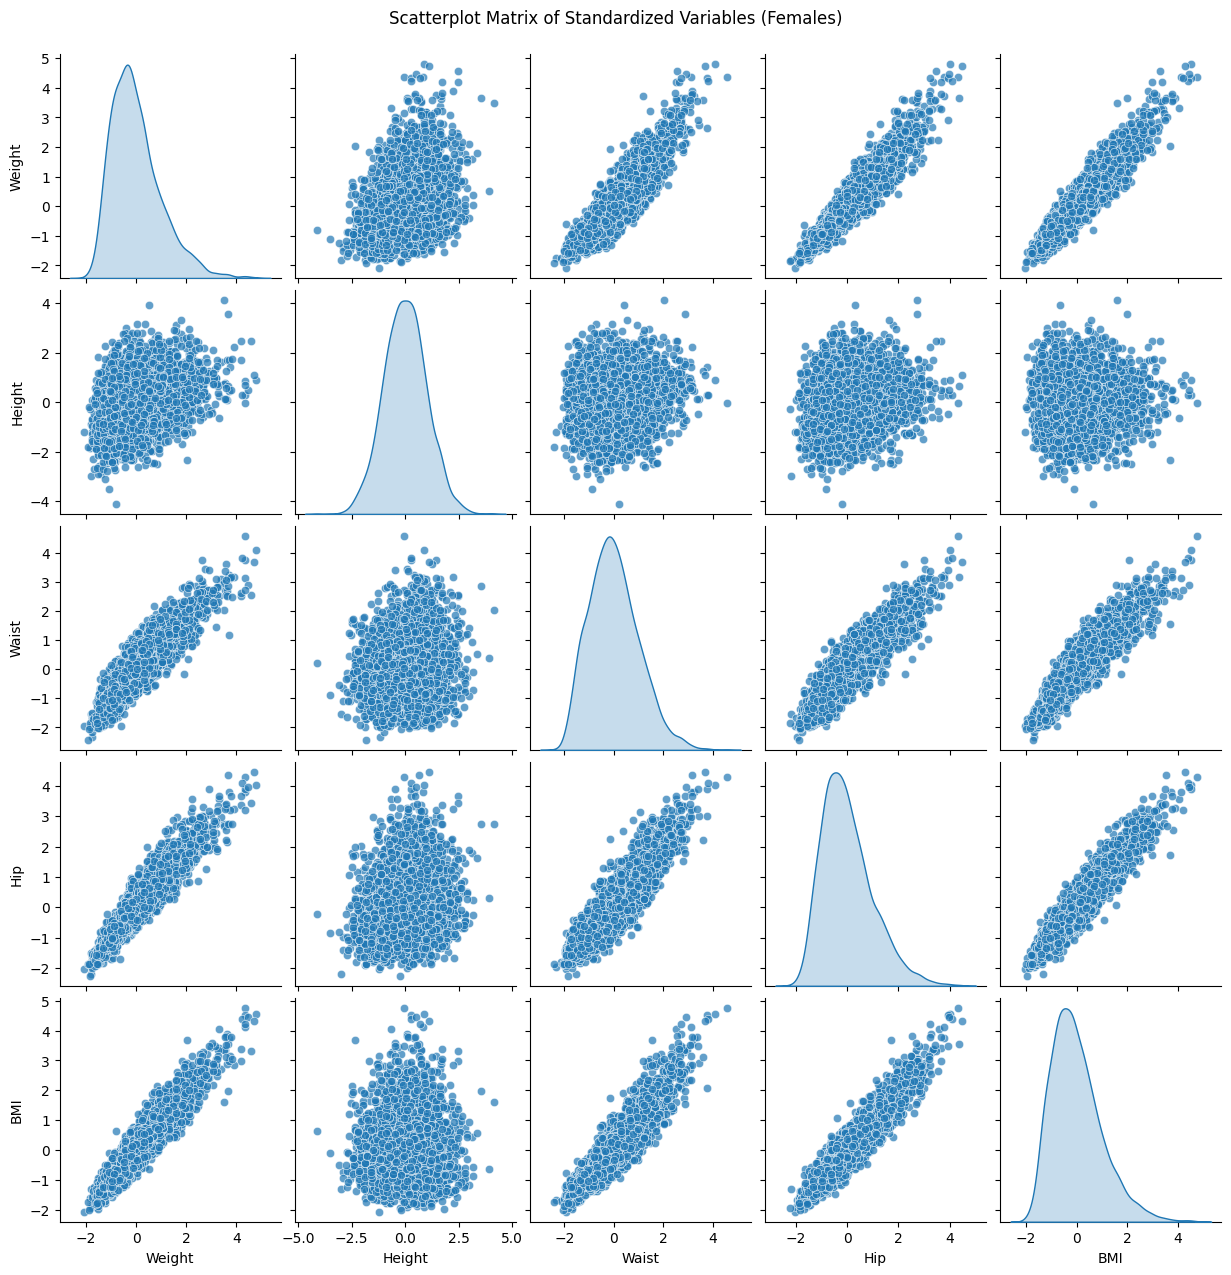

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the scatterplot matrix (weight, height, waist, hip, BMI)
columns_for_plot = ["Weight", "Height", "Waist", "Hip", "BMI"]
zfemale_df = pd.DataFrame(zfemale[:, [0, 1, 6, 5, 7]], columns=columns_for_plot)

# Create scatterplot matrix
sns.pairplot(zfemale_df, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Scatterplot Matrix of Standardized Variables (Females)", y=1.02)
plt.show()


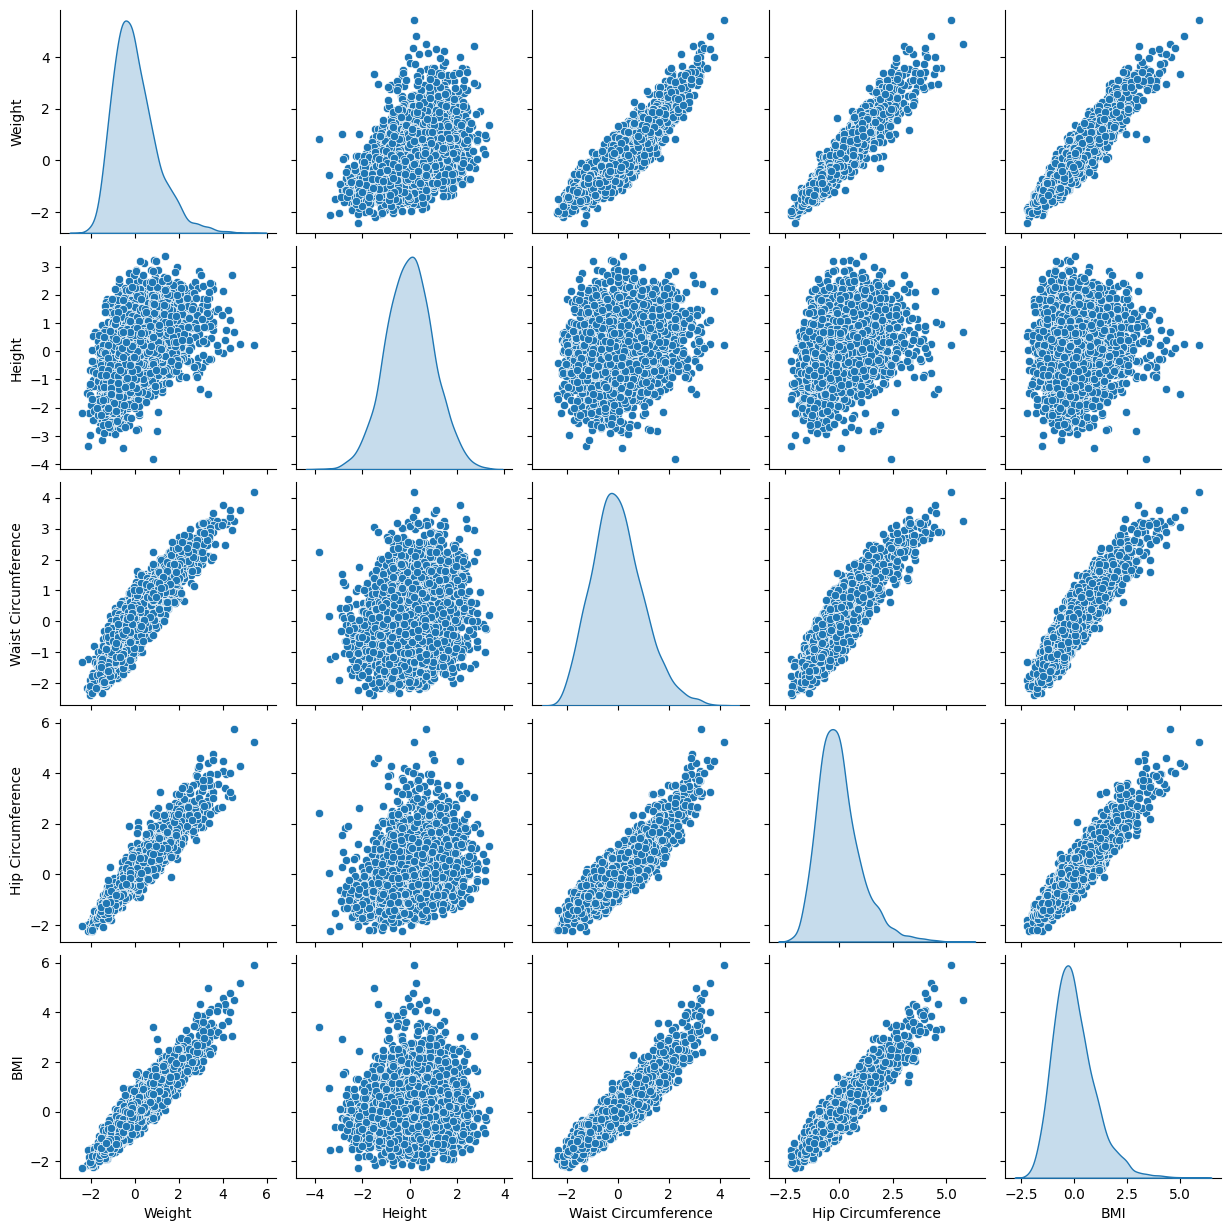

In [ ]:
import seaborn as sns
import pandas as pd

# Select relevant columns: weight, height, waist circumference, hip circumference, and BMI
selected_columns = [0, 1, 6, 5, 7]  # Indices for weight, height, waist, hip, and BMI
zmale_subset = zmale[:, selected_columns]

# Convert to a DataFrame for easier plotting
male_df = pd.DataFrame(
    zmale_subset,
    columns=["Weight", "Height", "Waist Circumference", "Hip Circumference", "BMI"]
)

# Plot the scatterplot matrix
sns.pairplot(male_df, diag_kind="kde")


# Adding Ratios: Waist-to-Height and Waist-to-Hip

To enhance the dataset, two important ratios—waist-to-height ratio and waist-to-hip ratio—are calculated for each male and female participant and added as new columns to the dataset. These ratios provide additional insights into body measurements and their potential health implications.

- **Results**:
  - The first five rows of the female and male datasets with the newly calculated Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR) are displayed. These ratios help in evaluating body composition and potential health risks, such as obesity and cardiovascular conditions, based on waist, height, and hip circumference data.



In [ ]:
# Calculate the ratios
waist_to_height_ratio = female_cleaned[:, 6] / female_cleaned[:, 1]
waist_to_hip_ratio = female_cleaned[:, 6] / female_cleaned[:, 5]

# Add ratios as new columns
female_cleaned = np.column_stack((female_cleaned, waist_to_height_ratio, waist_to_hip_ratio))

print("Female Dataset with Ratios (first 5 rows):")
print(female_cleaned[:5])  # Display first 5 rows


Female Dataset with Ratios (first 5 rows):
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078   0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037   0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496   0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849   0.57496823   0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132   0.47347995   0.79135135]]


In [ ]:
# Calculate the ratios
waist_to_height_ratio_male = male_cleaned[:, 6] / male_cleaned[:, 1]  # Waist / Height
waist_to_hip_ratio_male = male_cleaned[:, 6] / male_cleaned[:, 5]  # Waist / Hip

# Add the ratios as new columns
male_cleaned = np.column_stack((male_cleaned, waist_to_height_ratio_male, waist_to_hip_ratio_male))

print("Male Dataset with Ratios (first 5 rows):")
print(male_cleaned[:5])  # Display first 5 rows


Male Dataset with Ratios (first 5 rows):
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4         29.72922633   0.66044981   1.11275416]
 [ 74.3        184.2         41.1         41.          30.2
   94.5         86.8         21.89825769   0.47122693   0.91851852]
 [103.7        185.3         47.          44.          32.
  107.8        109.6         30.20145858   0.59147329   1.01669759]
 [ 86.         167.8         39.5         38.4         29.
  106.4        108.3         30.54320016   0.6454112    1.01785714]
 [ 99.4        181.6         40.4         39.9         36.
  120.2        107.          30.1407945    0.58920705   0.89018303]]


# Box-and-Whisker Plot for Waist Ratios

We will now create a box-and-whisker plot comparing the waist-to-height ratio (WHtR) and waist-to-hip ratio (WHR) between males and females. This comparison will provide insights into the differences in fat distribution between the two genders.
- **Results**:
  
  - For females, WHtR shows a consistent range, while WHR has more variability.  
  - For males, WHtR is uniformly distributed, whereas WHR displays a wider spread.  


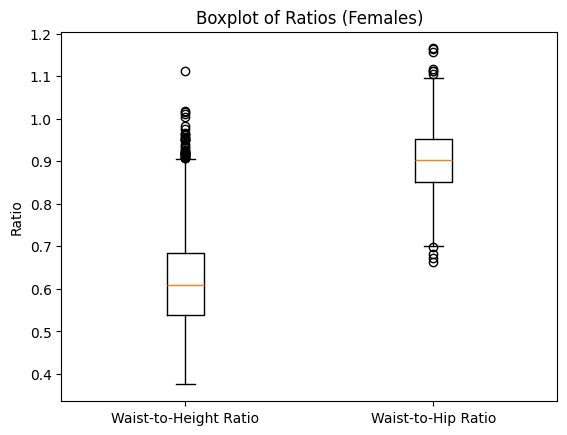

In [ ]:
# Boxplots for WHtR and WHR (Females)
import matplotlib.pyplot as plt
plt.boxplot(
    [female_cleaned[:, -2], female_cleaned[:, -1]],
    labels=["Waist-to-Height Ratio", "Waist-to-Hip Ratio"]
)
plt.title("Boxplot of Ratios (Females)")
plt.ylabel("Ratio")
plt.show()


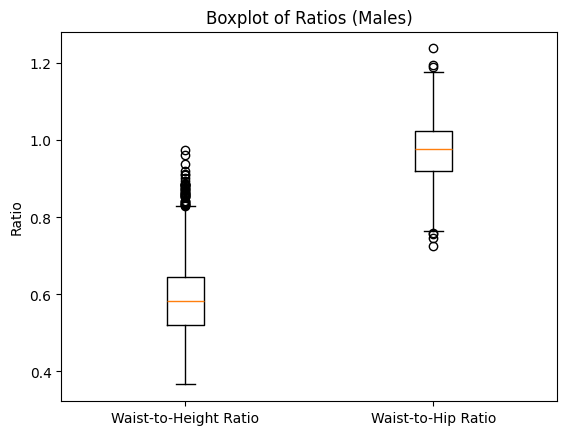

In [ ]:
# Boxplots for WHtR and WHR (Males)
plt.boxplot(
    [male_cleaned[:, -2], male_cleaned[:, -1]],
    labels=["Waist-to-Height Ratio", "Waist-to-Hip Ratio"]
)
plt.title("Boxplot of Ratios (Males)")
plt.ylabel("Ratio")
plt.show()


# Boxplot Comparison of Ratios (Male vs Female)

This code visualizes the comparison of Waist-to-Height Ratios (WHtR) and Waist-to-Hip Ratios (WHR) between males and females using boxplots. The ratios are extracted from the cleaned datasets, and the plot includes:

  - **Female WHtR and WHR**: Represented as the first two boxplots.
  - **Male WHtR and WHR**: Represented as the last two boxplots.

#### **Results**:
  
  - The boxplot comparing the Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR) for both males and females visually illustrates the distribution of these ratios. It shows the variation between genders, indicating differences in body measurements that may be used for health risk assessments.


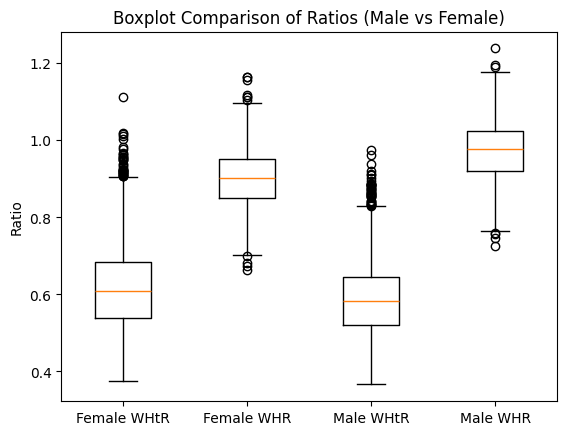

In [ ]:
# Combine male and female ratios for comparison
plt.boxplot(
    [
        female_cleaned[:, -2], female_cleaned[:, -1],  # Female ratios
        male_cleaned[:, -2], male_cleaned[:, -1]  # Male ratios
    ],
    labels=[
        "Female WHtR", "Female WHR",
        "Male WHtR", "Male WHR"
    ]
)
plt.title("Boxplot Comparison of Ratios (Male vs Female)")
plt.ylabel("Ratio")
plt.show()


# Correlation Analysis

- **Pearson’s Correlation Matrix**: Measures the linear relationship between variables.
- **Spearman’s Correlation Matrix**: Measures the monotonic relationship between variables, capturing non-linear trends.

Both matrices help identify patterns and dependencies among variables, providing insights into how different body measurements relate to each other.
- **Results**:
  
 - **Male Dataset**: The correlation matrices reveal the relationships between weight, height, waist circumference, hip circumference, and BMI. Pearson's correlation provides linear relationships, while Spearman’s correlation captures monotonic relationships.
 - **Female Dataset**: Similarly, for females, both Pearson’s and Spearman’s matrices highlight correlations between the same variables, showing linear and monotonic trends in the dataset.



In [ ]:
# Compute Pearson’s correlation matrix
pearson_corr = male_df.corr(method='pearson')
print("Pearson’s Correlation Matrix:")
print(pearson_corr)

# Compute Spearman’s correlation matrix
spearman_corr = male_df.corr(method='spearman')
print("\nSpearman’s Correlation Matrix:")
print(spearman_corr)


Pearson’s Correlation Matrix:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.434153             0.898946   
Height               0.434153  1.000000             0.175737   
Waist Circumference  0.898946  0.175737             1.000000   
Hip Circumference    0.941900  0.302236             0.894693   
BMI                  0.929364  0.080403             0.924239   

                     Hip Circumference       BMI  
Weight                        0.941900  0.929364  
Height                        0.302236  0.080403  
Waist Circumference           0.894693  0.924239  
Hip Circumference             1.000000  0.924598  
BMI                           0.924598  1.000000  

Spearman’s Correlation Matrix:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.439461             0.884366   
Height               0.439461  1.000000             0.162767   
Waist Circumference  0.884366  0.162767             1.0

In [ ]:
# Compute Pearson’s correlation matrix for females
pearson_corr_female = zfemale_df.corr(method='pearson')
print("Pearson’s Correlation Matrix for Females:")
print(pearson_corr_female)

# Compute Spearman’s correlation matrix for females
spearman_corr_female = zfemale_df.corr(method='spearman')
print("\nSpearman’s Correlation Matrix for Females:")
print(spearman_corr_female)


Pearson’s Correlation Matrix for Females:
          Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.345496  0.904550  0.946553  0.945900
Height  0.345496  1.000000  0.126547  0.202895  0.033077
Waist   0.904550  0.126547  1.000000  0.897407  0.921198
Hip     0.946553  0.202895  0.897407  1.000000  0.944199
BMI     0.945900  0.033077  0.921198  0.944199  1.000000

Spearman’s Correlation Matrix for Females:
          Weight    Height     Waist       Hip       BMI
Weight  1.000000  0.338860  0.900169  0.946634  0.937999
Height  0.338860  1.000000  0.108587  0.205405  0.019897
Waist   0.900169  0.108587  1.000000  0.888037  0.923114
Hip     0.946634  0.205405  0.888037  1.000000  0.934196
BMI     0.937999  0.019897  0.923114  0.934196  1.000000


# Correlation Heatmaps (Male and Female)

- **Pearson Correlation Heatmap**: Displays the linear correlation coefficients between variables using a color-coded grid.
- **Spearman Correlation Heatmap**: Visualizes the monotonic relationships between variables, capturing both linear and non-linear associations.

- **Results**:
 - **Female Correlations:** Pearson and Spearman heatmaps show strong positive correlations between BMI, waist, and hip measurements. Height has weaker correlations with other variables.
 - **Male Correlations:** Similar trends are observed, with BMI strongly correlated to waist and hip measurements. Slightly stronger correlations for height are noted compared to females.



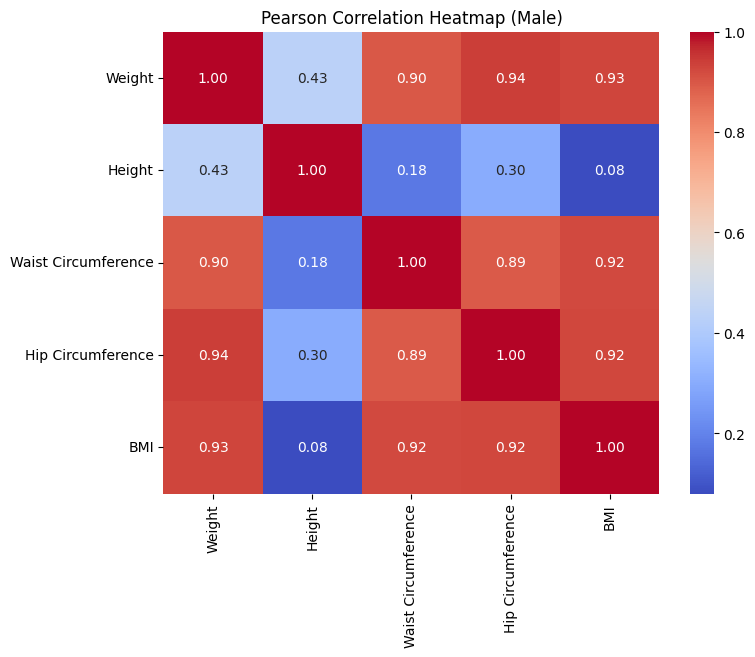

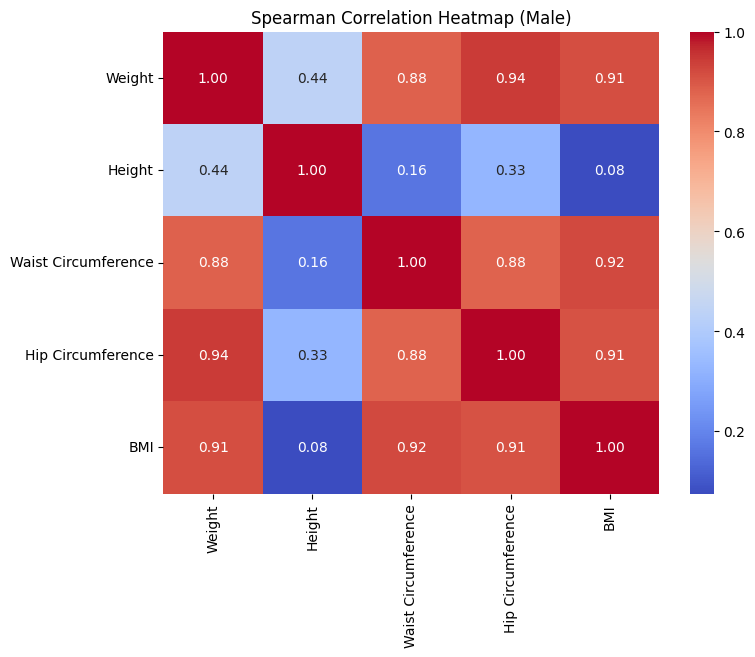

In [ ]:
# Pearson Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap (Male)")
plt.show()

# Spearman Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap (Male)")
plt.show()


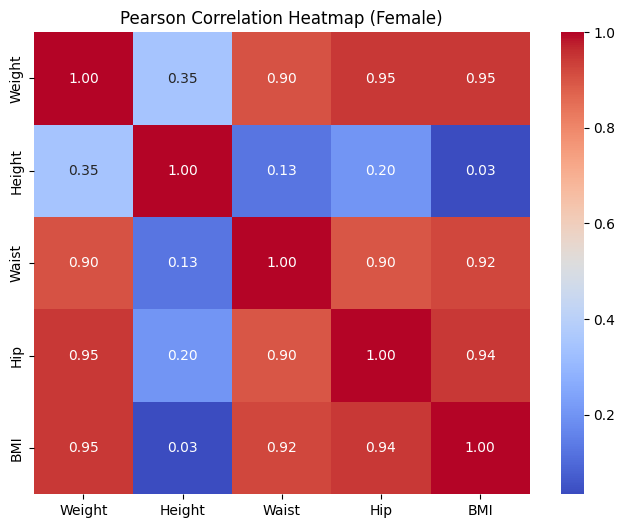

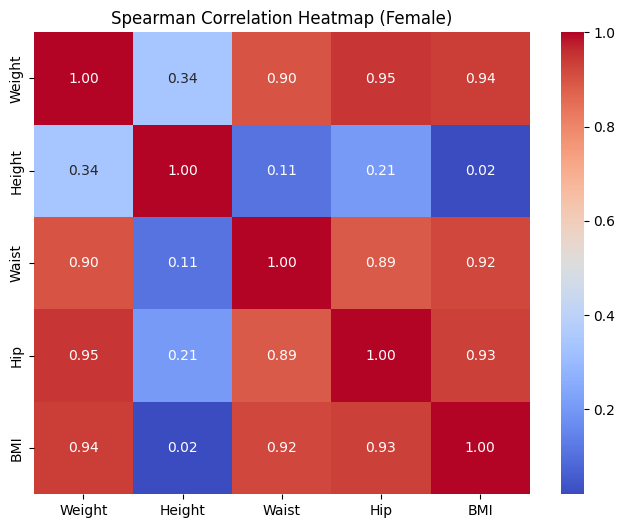

In [ ]:
# Compute Pearson and Spearman Correlation matrices for females
pearson_corr_female = zfemale_df.corr(method='pearson')
spearman_corr_female = zfemale_df.corr(method='spearman')

# Pearson Correlation Heatmap for females
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_female, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap (Female)")
plt.show()

# Spearman Correlation Heatmap for females
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_female, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap (Female)")
plt.show()


# Waist-to-Height and Waist-to-Hip Ratios Calculation

This code calculates and appends two important health-related ratios for both male and female datasets:

1. **Waist-to-Height Ratio (WHtR)**:
   - Computed as the ratio of waist circumference to height.
   - Indicates central obesity relative to height.

2. **Waist-to-Hip Ratio (WHR)**:
   - Computed as the ratio of waist circumference to hip circumference.
   - Used to assess body fat distribution.

The ratios are added as new columns to the cleaned male and female datasets. The first five rows of the updated datasets are displayed for verification.
- **Results**:

   - The updated female dataset now includes the calculated Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR) as new columns.

  - Similarly, the updated male dataset now includes the calculated Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR).


In [ ]:
# Compute Waist-to-Height and Waist-to-Hip Ratios for Female
waist_female = female_cleaned[:, 6]  # Waist circumference in cm
height_female = female_cleaned[:, 1]  # Height in cm
hip_female = female_cleaned[:, 5]    # Hip circumference in cm

# Waist-to-Height Ratio
waist_to_height_female = waist_female / height_female

# Waist-to-Hip Ratio
waist_to_hip_female = waist_female / hip_female

# Add the new columns to the female dataset
female_cleaned = np.column_stack((female_cleaned, waist_to_height_female, waist_to_hip_female))

print("Updated female dataset with ratios:")
print(female_cleaned[:5])  # Display first 5 rows

# Similarly for Male
waist_male = male_cleaned[:, 6]  # Waist circumference in cm
height_male = male_cleaned[:, 1]  # Height in cm
hip_male = male_cleaned[:, 5]    # Hip circumference in cm

# Waist-to-Height Ratio
waist_to_height_male = waist_male / height_male

# Waist-to-Hip Ratio
waist_to_hip_male = waist_male / hip_male

# Add the new columns to the male dataset
male_cleaned = np.column_stack((male_cleaned, waist_to_height_male, waist_to_hip_male))

print("Updated male dataset with ratios:")
print(male_cleaned[:5])  # Display first 5 rows


Updated female dataset with ratios:
[[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078   0.73595506   0.93497224
    0.73595506   0.93497224]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037   0.67518009   0.82151394
    0.67518009   0.82151394]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496   0.5707196    0.86629002
    0.5707196    0.86629002]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849   0.57496823   0.8960396
    0.57496823   0.8960396 ]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132   0.47347995   0.79135135
    0.47347995   0.79135135]]
Updated male dataset with ratios:
[[ 98.8        182.3         42.          40.1         38.2
  108.2        120.4         29.72922633   0.66044981   1.11275416
    0.66044981   1.11275

# Boxplot for Waist-to-Height and Waist-to-Hip Ratios

This visualization compares the Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR) across male and female datasets.

- **Data Visualization**:
  - Four categories are plotted:
    - Female Waist-to-Height Ratio
    - Male Waist-to-Height Ratio
    - Female Waist-to-Hip Ratio
    - Male Waist-to-Hip Ratio
  - The boxplot highlights the distribution and variability of these ratios.

- **Purpose**:
  - To identify patterns and differences in these health-related ratios between males and females.

The plot is created using a combined dataset for a clear comparison of the ratios.
- **Results**:
  - The boxplots reveal similar ranges for Waist-to-Height Ratios in both males and females, with females showing slightly less variability.
  - In contrast, males exhibit a higher median and lower variability for Waist-to-Hip Ratios, reflecting gender-based differences in body composition.


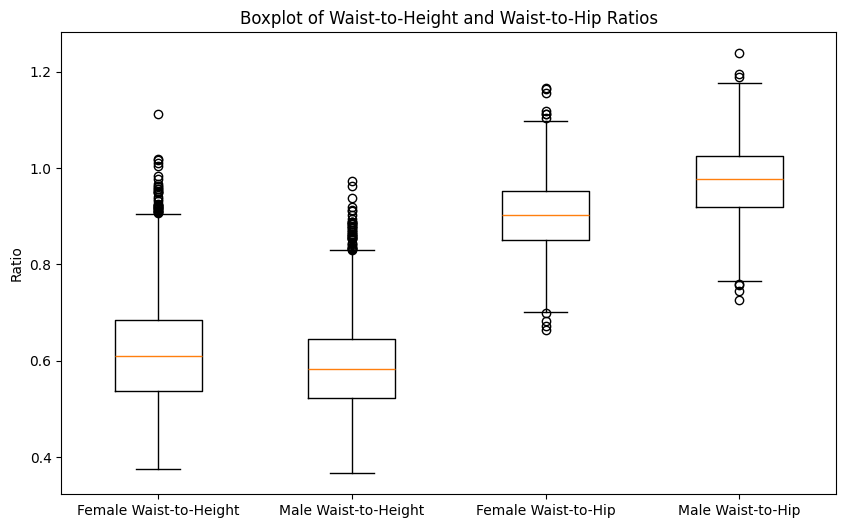

In [ ]:
# Create a boxplot for Waist-to-Height and Waist-to-Hip Ratios
plt.figure(figsize=(10, 6))

# Combine both male and female ratios
data = [waist_to_height_female, waist_to_height_male, waist_to_hip_female, waist_to_hip_male]

# Plotting
plt.boxplot(data, labels=['Female Waist-to-Height', 'Male Waist-to-Height', 'Female Waist-to-Hip', 'Male Waist-to-Hip'])
plt.title("Boxplot of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio")
plt.show()


# Advantages and Disadvantages of BMI, Waist-to-Height, and Waist-to-Hip Ratios

#### **Body Mass Index (BMI)**
- **Advantages:**
  - Simple to calculate and widely used.
  - Useful for identifying underweight, overweight, and obese categories.
- **Disadvantages:**
  - Doesn't differentiate between muscle and fat, leading to misclassifications (e.g., muscular individuals may be classified as overweight).
  - Does not account for fat distribution.

#### **Waist-to-Height Ratio**
- **Advantages:**
  - Better predictor of cardiovascular risk than BMI.
  - Takes into account fat distribution around the abdomen.
- **Disadvantages:**
  - Requires accurate waist measurement, which may not be available or easy to obtain.
  
#### **Waist-to-Hip Ratio**
- **Advantages:**
  - Helps assess risk of heart disease and metabolic disorders.
  - More specific to fat distribution than BMI.
- **Disadvantages:**
  - Requires accurate waist and hip measurements.
  - May not account for overall body fat percentage.


# Standardized Body Measurements for Extremes in BMI

This section focuses on identifying and analyzing individuals with the lowest and highest BMI in the female dataset using their standardized body measurements.

- **Results**:

 **Individuals with the Lowest BMI**:
   - The standardized measurements for the 5 individuals with the lowest BMI reveal the following trends:
     - **Lower weight, waist, and hip circumferences**: These individuals generally exhibit z-scores below 0 for these measurements, indicating smaller body dimensions compared to the population average.
     - **Taller heights in some cases**: A few individuals have relatively high z-scores for height (e.g., 1.580), suggesting that their taller stature contributes to a lower BMI despite smaller body circumferences.
     - Example: One individual has a BMI z-score of **-1.643**, which reflects a significantly lower BMI, accompanied by smaller waist and hip measurements.

2. **Individuals with the Highest BMI**:
   - For the 5 individuals with the highest BMI, the data reveals:
     - **Higher weight, waist, and hip circumferences**: These individuals have z-scores significantly above 0 for body measurements, reflecting larger body dimensions relative to the population average.
     - **Shorter height in some cases**: A few individuals have negative z-scores for height (e.g., -1.152), indicating that shorter stature may contribute to their higher BMI when combined with larger body circumferences.
     - Example: One individual shows a BMI z-score of **3.106**, coupled with a weight z-score of **3.593**, indicating extreme values for these metrics.

**Key Insights**:
- **Low BMI Profiles**: Characterized by lean body dimensions, with smaller waist and hip circumferences. In some cases, taller stature further accentuates the low BMI.
- **High BMI Profiles**: Marked by larger body dimensions, with higher waist, hip, and weight measurements. Shorter stature may amplify BMI for some individuals.

These observations highlight how body composition varies across individuals with extreme BMI values, offering a deeper understanding of the relationship between body dimensions and BMI.

In [ ]:
# Sort female data by BMI (descending for highest, ascending for lowest)
sorted_female_indices = np.argsort(female_cleaned[:, -1])

# Get indices of the 5 lowest and 5 highest BMI
lowest_bmi_indices = sorted_female_indices[:5]
highest_bmi_indices = sorted_female_indices[-5:]

# Extract standardized body measurements (z-scores) for these individuals
lowest_bmi_data = zfemale[lowest_bmi_indices]
highest_bmi_data = zfemale[highest_bmi_indices]

print("Standardized body measurements for 5 individuals with the lowest BMI:")
print(lowest_bmi_data)

print("Standardized body measurements for 5 individuals with the highest BMI:")
print(highest_bmi_data)


Standardized body measurements for 5 individuals with the lowest BMI:
[[ 1.9308898   0.70280266  0.83933161  2.439554    1.42444755  2.25455325
  -0.16025882  1.74767275]
 [-0.60827599  0.4337579  -0.6100227   0.26194406 -0.57235722 -0.84995477
  -1.95361716 -0.76871509]
 [-0.73360959  1.58073821  0.28516673  1.25742289 -1.39247347 -0.43388669
  -1.64322822 -1.17480097]
 [ 0.12515764 -0.72738266  0.15728252  0.19972664  1.83450568  1.31359928
  -0.44765599  0.41738459]
 [ 0.08802176  1.05680893 -0.52476656  0.63524862 -0.26927078  0.70549977
  -0.81552437 -0.2414452 ]]
Standardized body measurements for 5 individuals with the highest BMI:
[[-9.30156574e-02 -5.85780152e-01  7.96703544e-01 -3.91338918e-01
  -1.84157207e-03 -5.17100302e-01  7.99647734e-01  1.13411604e-01]
 [ 3.58343645e+00  1.24089219e+00  4.13050931e-01 -4.91430705e-02
   1.29964725e+00  2.22894906e+00  3.59314824e+00  3.10637543e+00]
 [ 4.16019071e-02 -1.15219018e+00 -1.24944372e+00 -1.48014389e+00
  -4.11899695e-01 -6.